# **1. Perkenalan Dataset**


# 1. Deskripsi Dataset

Proyek ini menggunakan **Synchronous Machine Dataset** untuk melakukan prediksi nilai kontinu (Regresi). Tujuan utamanya adalah mengestimasi nilai **Excitation Current ($I_f$)** berdasarkan parameter beban dan faktor daya. Data ini diperoleh dari kaggle https://www.kaggle.com/datasets/fedesoriano/synchronous-machine-dataset

* **Fitur Input ($X$):**
    1.  **$I_y$ (Load Current):** Arus beban pada motor.
    2.  **$PF$ (Power Factor):** Faktor daya operasional.
    3.  **$e\_PF$ (Power Factor Error):** Nilai kesalahan pada faktor daya.
    4.  **$d\_if$ (Changing of excitation current):** Perubahan nilai arus eksitasi mesin sinkron.

* **Target Output ($Y$):**
    1.  **$I_f$ (Excitation Current):** Arus eksitasi mesin sinkron yang akan diprediksi.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [5]:
# Install library
!pip install kagglehub[pandas-datasets] xgboost -q

# --- DATA & VISUALISASI ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter

# --- MACHINE LEARNING ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model-model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
import joblib

# Konfigurasi Plot
%matplotlib inline
sns.set_style("whitegrid")

print("Library siap digunakan!")

Library siap digunakan!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [6]:
file_path = "SynchronousMachine.csv"

# 3. Load dataset
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "fedesoriano/synchronous-machine-dataset",
  file_path,
)

/tmp/ipython-input-990098547.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'synchronous-machine-dataset' dataset.


In [7]:
print("--- 5 Baris Pertama Dataset ---")
display(df.head())

# 2. Memahami struktur dataset (Tipe data per kolom dan cek null values)
print("\n--- Informasi Struktur Data (Info) ---")
df.info()

# 3. Melihat dimensi data (Jumlah baris dan kolom)
print(f"\nUkuran Dataset: {df.shape[0]} baris, {df.shape[1]} kolom")

--- 5 Baris Pertama Dataset ---


,I_y,PF,e_PF,d_if,I_f
0,3.0,0.66,0.34,0.383,1.563
1,3.0,0.68,0.32,0.372,1.552
2,3.0,0.70,0.30,0.360,1.540
3,3.0,0.72,0.28,0.338,1.518
4,3.0,0.74,0.26,0.317,1.497



--- Informasi Struktur Data (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I_y     557 non-null    float64
 1   PF      557 non-null    float64
 2   e_PF    557 non-null    float64
 3   d_if    557 non-null    float64
 4   I_f     557 non-null    float64
dtypes: float64(5)
memory usage: 21.9 KB

Ukuran Dataset: 557 baris, 5 kolom


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [8]:
# --- Cek Data Kosong (Null/Missing Values) ---
print("--- Pengecekan Missing Values ---")
missing_values = df.isnull().sum()
print(missing_values)

# --- Cek Data Duplikat ---
print("\n--- Pengecekan Data Duplikat ---")
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")


--- Pengecekan Missing Values ---
I_y     0
PF      0
e_PF    0
d_if    0
I_f     0
dtype: int64

--- Pengecekan Data Duplikat ---
Jumlah baris duplikat: 0


--- Ringkasan Statistik ---


,count,mean,std,min,25%,50%,75%,max
I_y,557.0,4.499820,0.896024,3.000,3.700,4.500,5.300,6.000
PF,557.0,0.825296,0.103925,0.650,0.740,0.820,0.920,1.000
e_PF,557.0,0.174704,0.103925,0.000,0.080,0.180,0.260,0.350
d_if,557.0,0.350659,0.180566,0.037,0.189,0.345,0.486,0.769
I_f,557.0,1.530659,0.180566,1.217,1.369,1.525,1.666,1.949


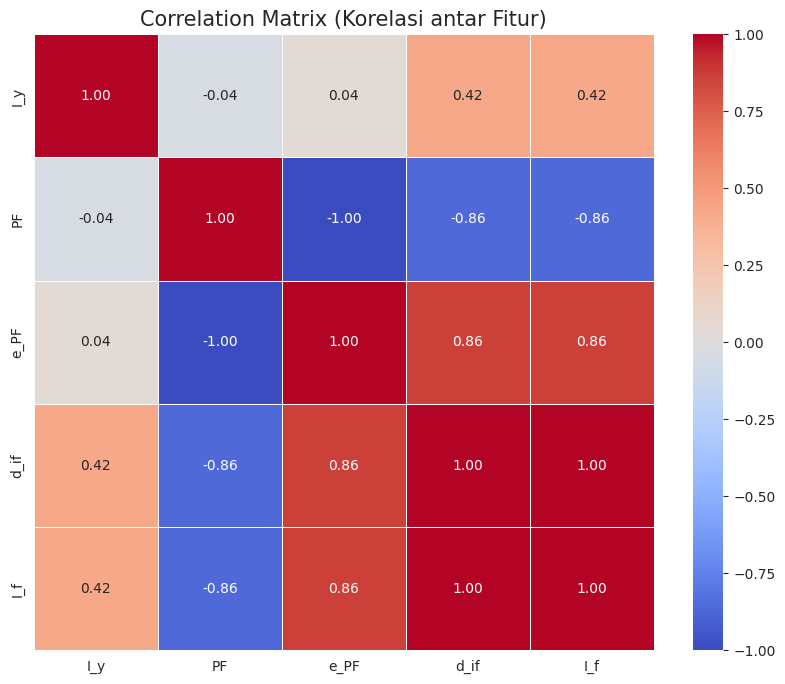


--- Visualisasi Hubungan Antar Variabel (Pairplot) ---


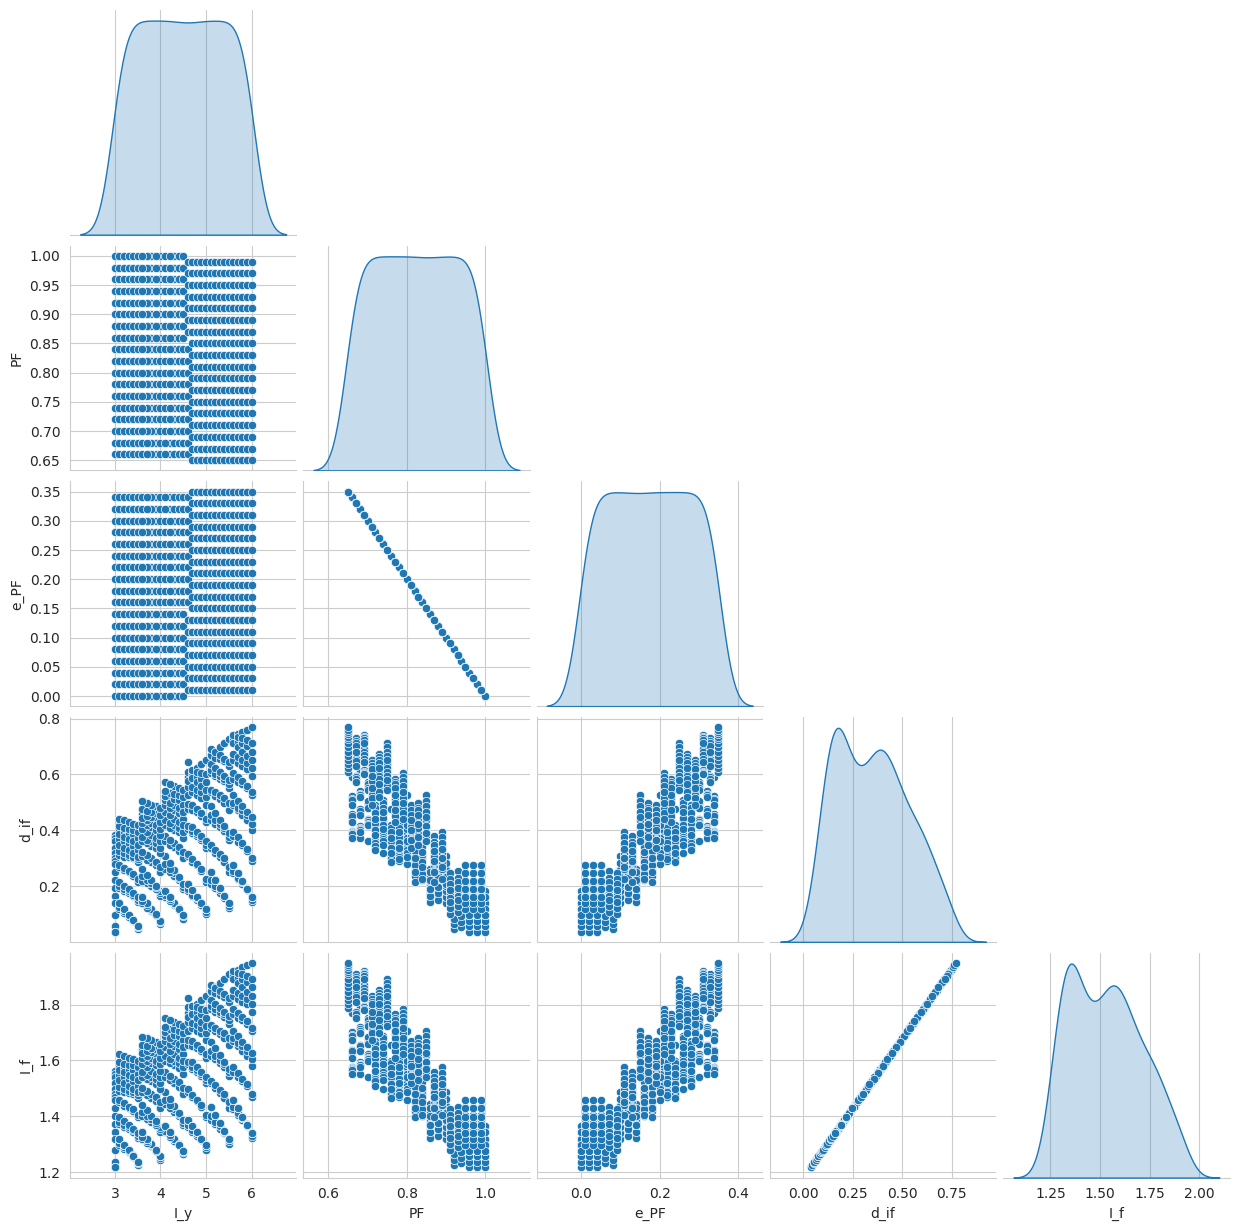

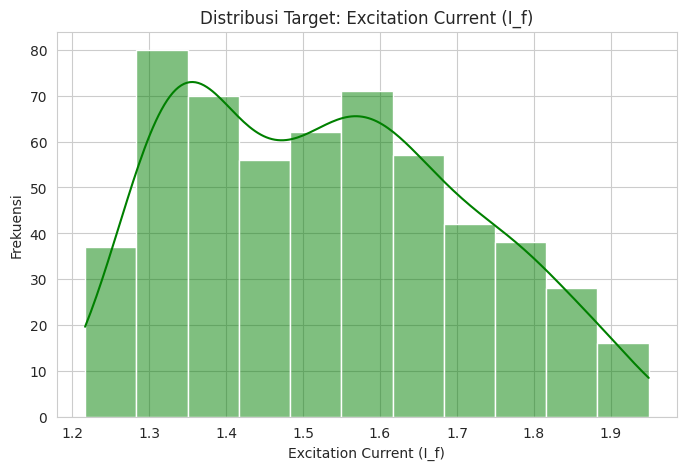

In [9]:
# --- 4. Exploratory Data Analysis (EDA) ---

# A. Statistik Deskriptif
# Melihat ringkasan statistik (mean, std, min, max, kuartil)
print("--- Ringkasan Statistik ---")
display(df.describe().T) # .T digunakan untuk transpose agar lebih mudah dibaca

# B. Analisis Korelasi (Heatmap)
# Ini langkah PENTING untuk melihat hubungan antar variabel
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()

# Membuat heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Korelasi antar Fitur)', fontsize=15)
plt.show()

# C. Visualisasi Distribusi (Pairplot)
# Melihat sebaran data dan hubungan antara setiap pasang variabel
# Perhatikan baris/kolom 'I_f' (Target) untuk melihat pola linearitas
print("\n--- Visualisasi Hubungan Antar Variabel (Pairplot) ---")
sns.pairplot(df, diag_kind='kde', corner=True) # corner=True agar tidak menampilkan grafik ganda
plt.show()

# D. Cek Distribusi Target (I_f)
# Penting untuk melihat apakah target kita terdistribusi normal atau miring (skewed)
plt.figure(figsize=(8, 5))
sns.histplot(df['I_f'], kde=True, color='green')
plt.title('Distribusi Target: Excitation Current (I_f)')
plt.xlabel('Excitation Current (I_f)')
plt.ylabel('Frekuensi')
plt.show()

##Hasil

Pada tahap ini, kita akan menggali wawasan dari data untuk menentukan strategi preprocessing yang tepat. Fokus utama analisis adalah melihat distribusi data dan hubungan (korelasi) antar variabel.

### Tujuan Analisis:
1.  **Memeriksa Kualitas Data:** Memastikan tidak ada nilai yang hilang (*missing values*) atau anomali ekstrim.
2.  **Identifikasi Hubungan Antar Fitur:** Melihat apakah ada fitur yang saling berkaitan erat (multikolinearitas).
3.  **Identifikasi Kebocoran Data (*Data Leakage*):** Memastikan tidak ada fitur input yang "membocorkan" jawaban target secara langsung.

---

### Temuan Penting dari Analisis:

#### 1. Redudansi Fitur (`PF` vs `e_PF`)
Dari matriks korelasi, terlihat hubungan **-1.0 (Korelasi Negatif Sempurna)** antara `PF` (Power Factor) dan `e_PF` (Error Power Factor).
* **Insight:** Ini menunjukkan bahwa $e\_PF$ hanyalah kebalikan matematis dari $PF$. Kedua fitur ini membawa informasi yang sama persis.
* **Tindakan Preprocessing:** Kita akan **membuang kolom `e_PF`** untuk mencegah multikolinearitas dan efisiensi model.

#### 2. Kebocoran Data / Data Leakage (`d_if`)
Ditemukan korelasi **1.0 (Sempurna)** antara fitur `d_if` (Change in excitation) dengan target `I_f` (Excitation Current).
* **Insight:** Secara matematis dalam dataset ini, $I_f$ tampaknya diturunkan langsung dari $d\_if$. Jika fitur ini dimasukkan ke dalam model, model akan "mencontek" jawaban alih-alih mempelajari pola fisika dari arus beban ($I_y$) dan faktor daya ($PF$).
* **Tindakan Preprocessing:** Kita **wajib membuang kolom `d_if`** agar model benar-benar belajar memprediksi target berdasarkan parameter operasional mesin, bukan dari bocoran jawaban.

#### 3. Perbedaan Skala Data
Rentang nilai antar fitur berbeda cukup signifikan (contoh: $I_y$ berkisar 3.0-6.0, sedangkan $PF$ berkisar 0.6-1.0).
* **Tindakan Preprocessing:** Diperlukan proses **Standardisasi (StandardScaler)** agar semua fitur memiliki skala yang setara (mean=0, std=1), yang akan membantu algoritma optimasi bekerja lebih baik.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [11]:

df_clean = df.drop(columns=['d_if', 'e_PF'])

X = df_clean.drop(columns=['I_f'])
y = df_clean['I_f']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_final = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_final = pd.DataFrame(X_test_scaled, columns=X.columns)
y_train_final = y_train.reset_index(drop=True)
y_test_final = y_test.reset_index(drop=True)

joblib.dump(scaler, 'scaler.pkl')

train_set = pd.concat([X_train_final, y_train_final], axis=1)
test_set = pd.concat([X_test_final, y_test_final], axis=1)

train_set.to_csv('data_train_clean.csv', index=False)
test_set.to_csv('data_test_clean.csv', index=False)

print("Preprocessing Selesai!")
print("File tersimpan: scaler.pkl, data_train_clean.csv, data_test_clean.csv")

Preprocessing Selesai!
File tersimpan: scaler.pkl, data_train_clean.csv, data_test_clean.csv
